# Netflix Dataset Analysis - EDA & Insights

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# ==============================
# 3. Dataset Overview
# ==============================
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate records:", df.duplicated().sum())

Shape of dataset: (7789, 11)

Data types:
 Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

Missing values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Duplicate records: 2


In [4]:
# ==============================
# 4. Data Cleaning
# ==============================
# Drop duplicates
df = df.drop_duplicates()


# Fill missing values where possible
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')


# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

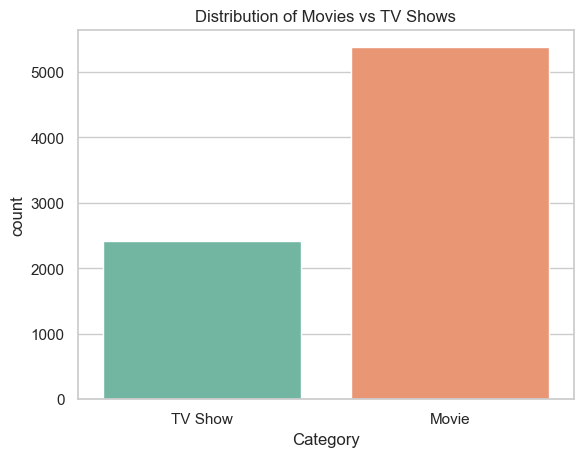

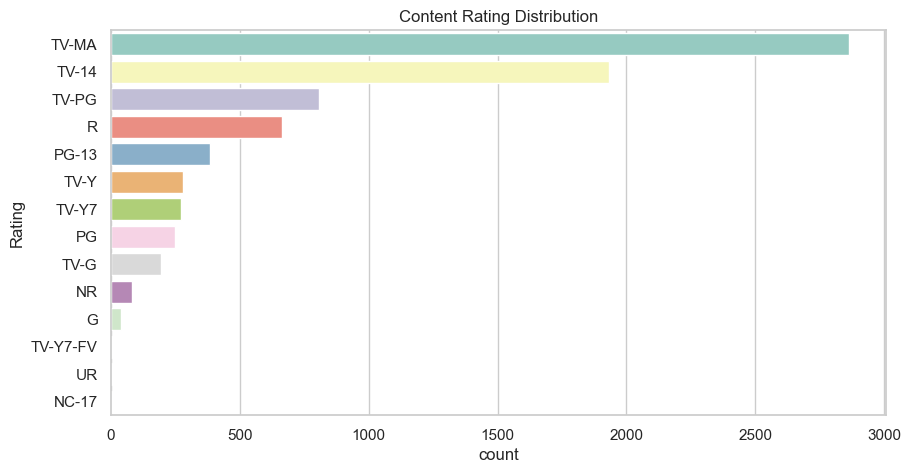

In [5]:
# ==============================
# 5. Univariate Analysis
# ==============================
# Movies vs TV Shows
sns.countplot(data=df, x='Category', palette='Set2')
plt.title("Distribution of Movies vs TV Shows")
plt.show()


# Ratings distribution
plt.figure(figsize=(10,5))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='Set3')
plt.title("Content Rating Distribution")
plt.show()

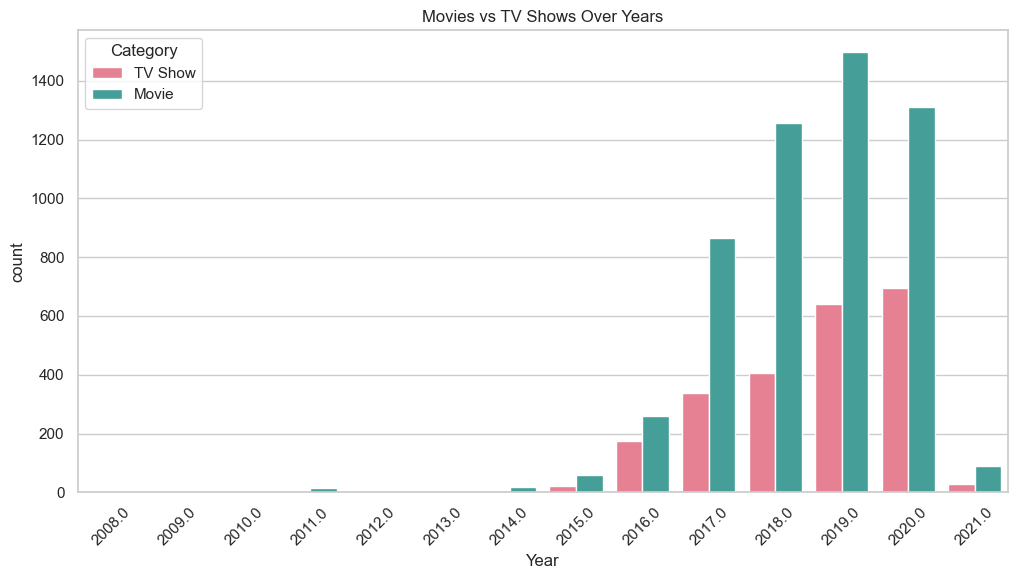

In [6]:
# ==============================
# 6. Content Trends Over Time
# ==============================
# Movies vs TV Shows by year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Category', palette='husl')
plt.xticks(rotation=45)
plt.title("Movies vs TV Shows Over Years")
plt.show()

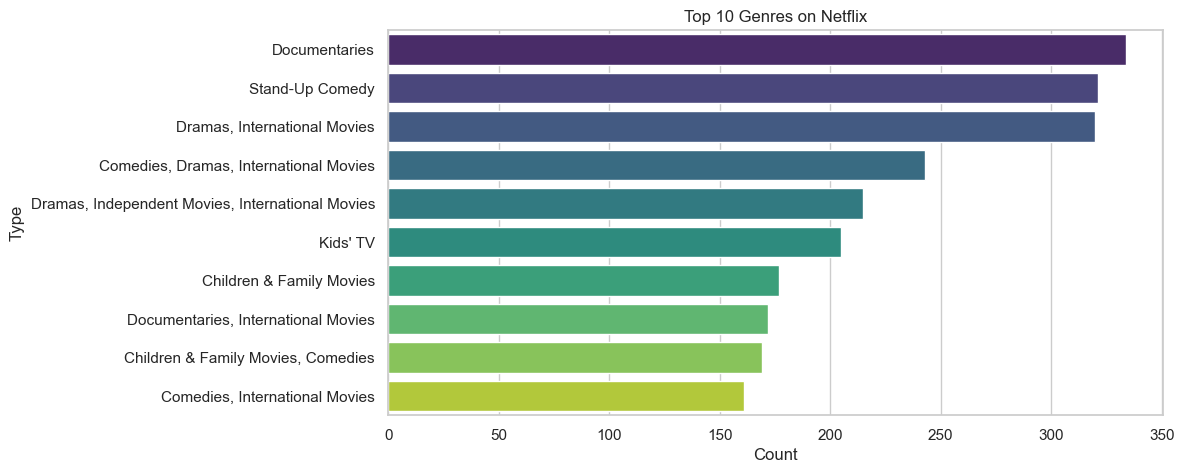

In [7]:
# ==============================
# 7. Genre / Type Analysis
# ==============================
# Top genres
top_genres = df['Type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.show()

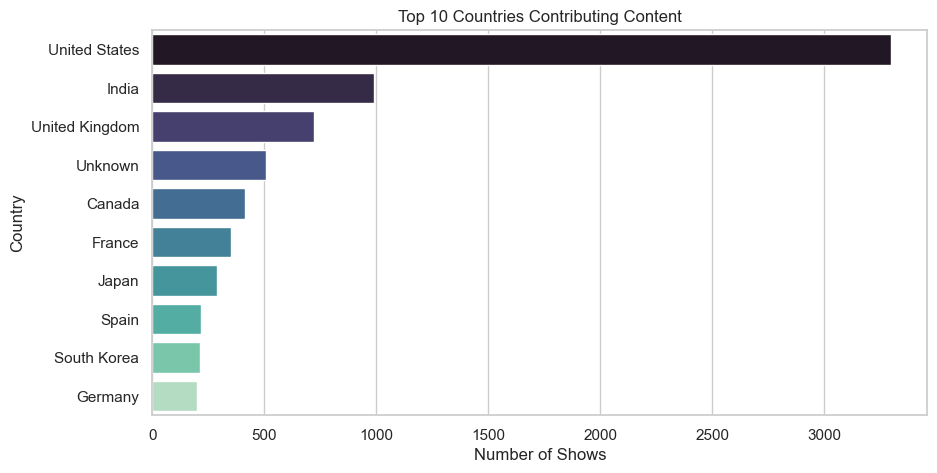

In [8]:
# ==============================
# 8. Country-wise Contributions
# ==============================
# Split multiple countries
df_countries = df.assign(Country=df['Country'].str.split(", ")).explode('Country')


country_counts = df_countries['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Shows")
plt.show()

C:\Users\hussa\AppData\Local\Temp\ipykernel_9388\1321948343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Minutes'] = movies['Duration'].str.replace(' min','').astype(str).str.extract('(\d+)')
C:\Users\hussa\AppData\Local\Temp\ipykernel_9388\1321948343.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Minutes'] = pd.to_numeric(movies['Minutes'], errors='coerce')


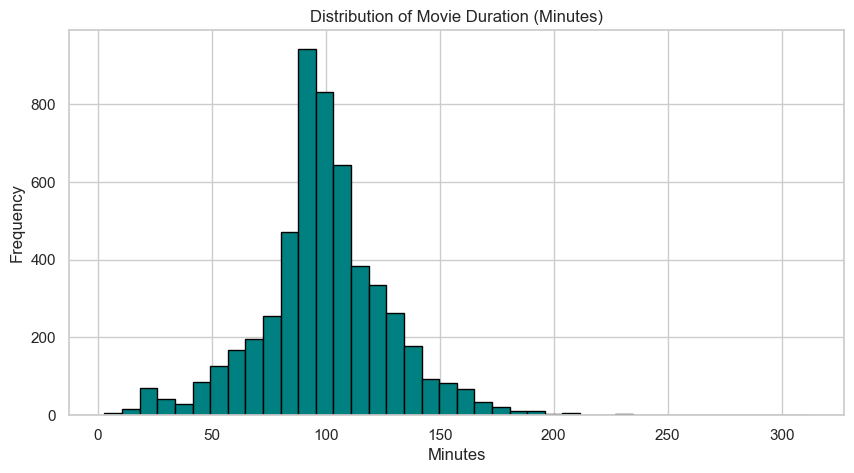

In [9]:
# ==============================
# 9. Duration Analysis
# ==============================
# Movies duration distribution
movies = df[df['Category']=="Movie"]
movies['Minutes'] = movies['Duration'].str.replace(' min','').astype(str).str.extract('(\d+)')
movies['Minutes'] = pd.to_numeric(movies['Minutes'], errors='coerce')


plt.figure(figsize=(10,5))
plt.hist(movies['Minutes'].dropna(), bins=40, color='teal', edgecolor='black')
plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

C:\Users\hussa\AppData\Local\Temp\ipykernel_9388\3877457789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['Seasons'] = tvshows['Duration'].str.replace(' Season[s]?', '', regex=True)
C:\Users\hussa\AppData\Local\Temp\ipykernel_9388\3877457789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['Seasons'] = pd.to_numeric(tvshows['Seasons'], errors='coerce')


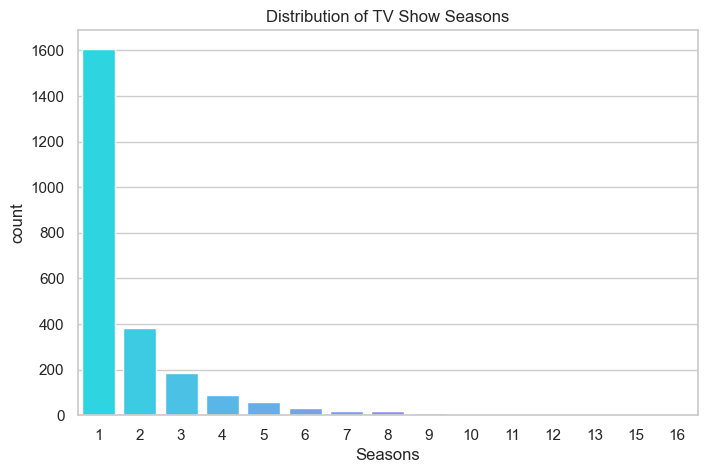

In [10]:
# TV Show seasons distribution
tvshows = df[df['Category']=="TV Show"]
tvshows['Seasons'] = tvshows['Duration'].str.replace(' Season[s]?', '', regex=True)
tvshows['Seasons'] = pd.to_numeric(tvshows['Seasons'], errors='coerce')


plt.figure(figsize=(8,5))
sns.countplot(x='Seasons', data=tvshows, palette='cool')
plt.title("Distribution of TV Show Seasons")
plt.show()

In [11]:
# ==============================
# 10. Insights & Recommendations
# ==============================
print("\n--- Insights Summary ---")
print("1. Movies dominate Netflix’s catalog, but TV Shows have grown steadily in recent years.")
print("2. Certain genres (e.g., Drama, Comedy, Documentaries) are consistently popular, while others are underrepresented.")
print("3. The USA and India are leading content contributors, but international diversity is increasing.")
print("4. Most movies fall between 80-120 minutes, while TV Shows are mostly 1-2 seasons, suggesting short-format dominance.")
print("5. Netflix should continue investing in diverse genres and expand global representation for better audience reach.")


--- Insights Summary ---
1. Movies dominate Netflix’s catalog, but TV Shows have grown steadily in recent years.
2. Certain genres (e.g., Drama, Comedy, Documentaries) are consistently popular, while others are underrepresented.
3. The USA and India are leading content contributors, but international diversity is increasing.
4. Most movies fall between 80-120 minutes, while TV Shows are mostly 1-2 seasons, suggesting short-format dominance.
5. Netflix should continue investing in diverse genres and expand global representation for better audience reach.
